In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
from matplotlib import rcParams

In [2]:
rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42
rcParams['font.family'] = 'serif'
rcParams['font.sans-serif'] = ['Palatio']
rcParams['text.usetex'] = True
rcParams['text.latex.preamble'] = r'\usepackage{amsfonts}'

colors = ["#56641a", "#c0affb", "#00678a", "#984464", "#5eccab", "#cdcdcd"]
c0 = colors[0]
c1 = colors[4]
c2 = colors[1]
c3 = colors[2]
c4 = colors[3]


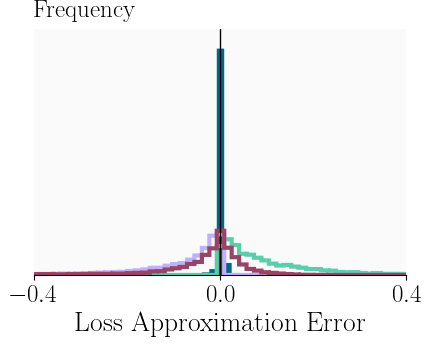

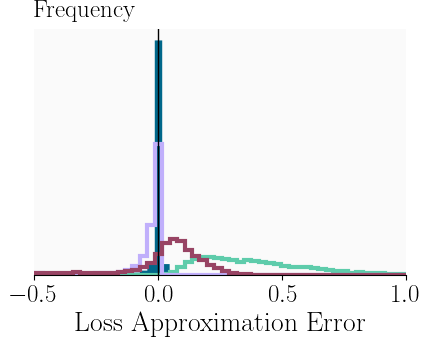

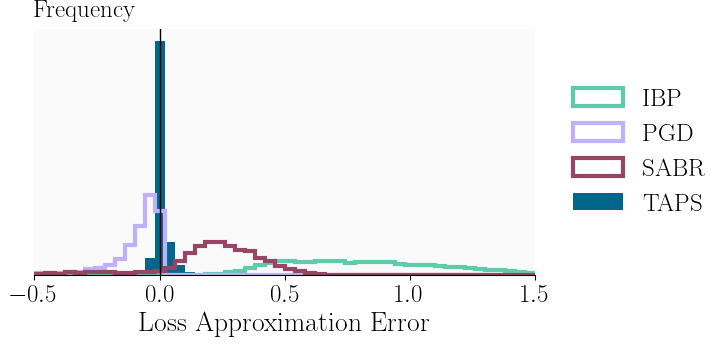

In [45]:
mode = "IBP" # IBP or TAPS

fig_height = 3.2


for mode in ["IBP", "SABR", "TAPS"]:

    if mode == "TAPS":
        fig, ax = plt.subplots(figsize=(2.02*fig_height, fig_height))
    else:
        fig, ax = plt.subplots(figsize=(1.5*fig_height, fig_height))

    fontsize=18

    ax.set_facecolor( (0.98, 0.98, 0.98) )
    ax.set_yticks([], [])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.xaxis.label.set_size(20)
    ax.yaxis.set_label_coords(0.0, 1.03)
    plt.setp(ax.get_xticklabels(), fontsize=fontsize)
    plt.setp(ax.get_yticklabels(), fontsize=fontsize)

    n=50.
    if mode == "IBP":
        d = 0.8 / n
    elif mode == "TAPS":
        d = 2. / n
    elif mode == "SABR":
        d = 1.5 / n
    else:
        assert False

    bins = np.concatenate([np.arange(-d/2,-5.-d/2.,-d)[::-1], np.arange(d/2,5.+d/2.+d/100.,d)], 0)

    root_path = f"exact_tightness/{mode}_results"
    IBP_bounds = (np.load(os.path.join(root_path, "IBP.npy"))).reshape(-1, 9)
    PGD_bounds = (np.load(os.path.join(root_path, "PGD.npy"))).reshape(-1, 9)
    TAPS_bounds = (np.load(os.path.join(root_path, "TAPS.npy"))).reshape(-1, 9)
    MILP_bounds = (np.load(os.path.join(root_path, "MILP.npy"))).reshape(-1, 9)
    small_SABR_bounds = (np.load(os.path.join(root_path, "small_SABR.npy"))).reshape(-1, 9)
    SABR_bounds = (np.load(os.path.join(root_path, "large_SABR.npy"))).reshape(-1, 9)


    # The estimated largest logit gap
    idxs = np.expand_dims(MILP_bounds.argmax(1),1)

    PGD_diff = np.take_along_axis(PGD_bounds-MILP_bounds, idxs, 1).flatten()
    filter = PGD_diff <= 0 # numerical error
    # filter = np.ones_like(filter)
    PGD_diff = PGD_diff[filter]
    IBP_diff = np.take_along_axis(IBP_bounds-MILP_bounds, idxs, 1).flatten()[filter]
    TAPS_diff = np.take_along_axis(TAPS_bounds-MILP_bounds, idxs, 1).flatten()[filter]
    SABR_diff = np.take_along_axis(SABR_bounds-MILP_bounds, idxs, 1).flatten()[filter]
    small_SABR_diff = np.take_along_axis(small_SABR_bounds-MILP_bounds, idxs, 1).flatten()[filter]


    ax.vlines(0, 0, 100, color="black", lw=1, zorder=20)
    ax.hist(IBP_diff, bins=bins, density=True, color=c1, histtype="step", label="IBP", lw=3)
    ax.hist(PGD_diff, bins=bins, density=True, color=c2, histtype="step", label="PGD", lw=3)
    # ax.hist(small_SABR_diff, density=True, histtype="step", label="small_SABR")
    ax.hist(SABR_diff, bins=bins, density=True, color=c4, histtype="step", label="SABR", lw=3)
    ax.hist(TAPS_diff, bins=bins, density=True, color=c3, histtype="stepfilled", label="TAPS", lw=3, zorder=1)

    ax.set_ylabel("Frequency", fontsize=fontsize, rotation=0, ha="left")
    ax.set_xlabel("Loss Approximation Error")
    if mode == "IBP":
        ax.set_xlim(-0.4, 0.4)
        ax.set_xticks([-0.4,0,0.4], fontsize=fontsize)
        ax.set_ylim(0, 60)
    elif mode == "TAPS":
        ax.set_xlim(-0.5, 1.5)
        ax.set_xticks([-0.5,0,0.5,1,1.5], fontsize=fontsize)
        ax.set_ylim(0, 20)
    elif mode == "SABR":
        ax.set_xlim(-0.5, 1)
        ax.set_xticks([-0.5,0,0.5,1], fontsize=fontsize)
        ax.set_ylim(0, 30)


    if mode == "TAPS":
        ax.legend(bbox_to_anchor=(1.03, 0.5), loc='center left', fontsize=fontsize, frameon=False)


    # plt.tight_layout()
    # plt.savefig(f"exact_tightness_{mode}.pdf")
    plt.savefig(f"/Users/mark/Projects/TAPS/sampling-cert-training-paper/paper/figures/exact_tightness_{mode}.pdf", bbox_inches="tight", pad_inches=0.12)


IBP cert: 0.8481, MILP cert: 0.8544
Mode: IBP, mean: 0.09727, std: 0.09828317165374756, mean abs: 0.09727
IBP cert: 0.8334, MILP cert: 0.8621
Mode: SABR, mean: 0.01628, std: 0.21469342708587646, mean abs: 0.14597
IBP cert: 0.8095, MILP cert: 0.8714
Mode: TAPS, mean: 0.00291, std: 0.03790251538157463, mean abs: 0.01649


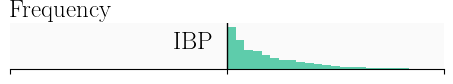

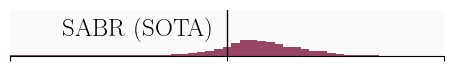

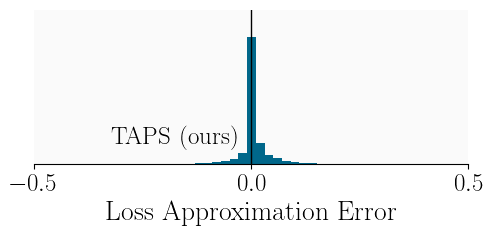

In [27]:
fig_height = 2.0

# mode = "IBP" # IBP or TAPS or SABR
# cert_acc = {"IBP":0.8481, "SABR":0.8543, "TAPS":0.8709}
cert_acc = {}
ibp_acc = {}
for mode in ["IBP", "SABR", "TAPS"]:
    hs = 0.3
    wf = 2.8
    if mode == "IBP":
        fig, ax = plt.subplots(figsize=(wf*fig_height, hs*fig_height))
    elif mode == "TAPS":
        fig, ax = plt.subplots(figsize=(wf*fig_height, fig_height))
    elif mode == "SABR":
        fig, ax = plt.subplots(figsize=(wf*fig_height, hs*fig_height))
    # fig, ax = plt.subplots(figsize=(11/4*fig_height, fig_height))

    fontsize=18

    ax.set_facecolor( (0.98, 0.98, 0.98) )
    ax.set_yticks([], [])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.xaxis.label.set_size(20)
    ax.yaxis.set_label_coords(0.0, 1.03)
    plt.setp(ax.get_xticklabels(), fontsize=fontsize)
    plt.setp(ax.get_yticklabels(), fontsize=fontsize)
    if mode == "IBP":
        bins = np.arange(-2.0,2.001,0.02)
    else:
        bins = np.arange(-2.01,2.001,0.02)


    root_path = f"exact_tightness/{mode}_results"
    IBP_bounds = (np.load(os.path.join(root_path, "IBP.npy"))).reshape(-1, 9)
    PGD_bounds = (np.load(os.path.join(root_path, "PGD.npy"))).reshape(-1, 9)
    TAPS_bounds = (np.load(os.path.join(root_path, "TAPS.npy"))).reshape(-1, 9)
    MILP_bounds = (np.load(os.path.join(root_path, "MILP.npy"))).reshape(-1, 9)
    small_SABR_bounds = (np.load(os.path.join(root_path, "small_SABR.npy"))).reshape(-1, 9)
    SABR_bounds = (np.load(os.path.join(root_path, "large_SABR.npy"))).reshape(-1, 9)

    cert_acc[mode] = (MILP_bounds.max(1)<0).astype(np.float32).mean()
    ibp_acc[mode] = (IBP_bounds.max(1)<0).astype(np.float32).mean()


    # The estimated largest logit gap
    idxs = np.expand_dims(MILP_bounds.argmax(1),1)

    PGD_diff = np.take_along_axis(PGD_bounds-MILP_bounds, idxs, 1).flatten()
    # filter = PGD_diff <= 0 # numerical error
    # filter = np.ones_like(filter)
    # PGD_diff = PGD_diff[filter]
    IBP_diff = np.take_along_axis(IBP_bounds-MILP_bounds, idxs, 1).flatten()[filter]
    TAPS_diff = np.take_along_axis(TAPS_bounds-MILP_bounds, idxs, 1).flatten()[filter]
    SABR_diff = np.take_along_axis(SABR_bounds-MILP_bounds, idxs, 1).flatten()[filter]
    small_SABR_diff = np.take_along_axis(small_SABR_bounds-MILP_bounds, idxs, 1).flatten()[filter]


    lw = 4

    print(f"IBP cert: {ibp_acc[mode]:.4f}, MILP cert: {cert_acc[mode]:.4f}")
    if mode == "IBP":
        ax.hist(IBP_diff, bins=bins, density=True, color=c1, histtype="stepfilled", label="IBP", lw=lw)
        print(f"Mode: {mode}, mean: {IBP_diff.mean():.5f}, std: {IBP_diff.std()}, mean abs: {np.abs(IBP_diff).mean():.5f}")
    elif mode == "TAPS":
        ax.hist(TAPS_diff, bins=bins, density=True, color=c3, histtype="stepfilled", label="TAPS", lw=lw, zorder=None)
        print(f"Mode: {mode}, mean: {TAPS_diff.mean():.5f}, std: {TAPS_diff.std()}, mean abs: {np.abs(TAPS_diff).mean():.5f}")
    elif mode == "SABR":
        ax.hist(SABR_diff, bins=bins, density=True, color=c4, histtype="stepfilled", label="SABR", lw=lw)
        print(f"Mode: {mode}, mean: {SABR_diff.mean():.5f}, std: {SABR_diff.std()}, mean abs: {np.abs(SABR_diff).mean():.5f}")
    else:
        assert False

    ax.vlines(0, 0, 100, color="black", lw=1, zorder=20)

    if mode == "IBP":
        ax.set_ylabel("Frequency", fontsize=fontsize, rotation=0, ha="left")
    if mode == "TAPS":
        # ax.set_xlabel("Worst-Case Loss Approximation Error")
        ax.set_xlabel("Loss Approximation Error")

    ax.set_xlim(-0.5, 0.5)
    ax.set_xticks([-0.5,0,0.5], fontsize=fontsize)

    if not mode == "TAPS":
        plt.tick_params(
        axis='both',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        # bottom=False,      # ticks along the bottom edge are off
        # top=False,         # ticks along the top edge are off
        # left=False,
        labelbottom=False,
        # labelleft=False,
        )

    ax.text(-0.03,1.6/hs,f"{mode}" + (" (ours)" if mode=="TAPS" else (" (SOTA)" if mode == "SABR" else "")), fontsize=fontsize,ha="right")
    # ax.text(0.1,1.6/hs,f"cert. Acc. {cert_acc[mode]*100:.1f}\%", fontsize=fontsize*0.8,ha="left")

    # ax.set_ylim(0, 40)
    if mode == "IBP":
        ax.set_ylim(0, 40*hs)
    elif mode == "TAPS":
        ax.set_ylim(0, 40)
    elif mode == "SABR":
        ax.set_ylim(0, 40*hs)

    plt.savefig(f"/Users/mark/Projects/TAPS/sampling-cert-training-paper/paper/figures/intro_tightness_{mode}.pdf", bbox_inches="tight", pad_inches=0.12)


In [36]:
res = np.take_along_axis(MILP_bounds,np.expand_dims(MILP_bounds.argmax(1),1),1)

(array([ 265.,  324.,  338.,  406.,  419.,  528.,  561.,  680.,  697.,
        1052.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.]),
 array([-1.00000000e-01, -9.00000000e-02, -8.00000000e-02, -7.00000000e-02,
        -6.00000000e-02, -5.00000000e-02, -4.00000000e-02, -3.00000000e-02,
        -2.00000000e-02, -1.00000000e-02, -5.55111512e-17,  1.00000000e-02,
         2.00000000e-02,  3.00000000e-02,  4.00000000e-02,  5.00000000e-02,
         6.00000000e-02,  7.00000000e-02,  8.00000000e-02,  9.00000000e-02,
         1.00000000e-01]),
 <BarContainer object of 20 artists>)

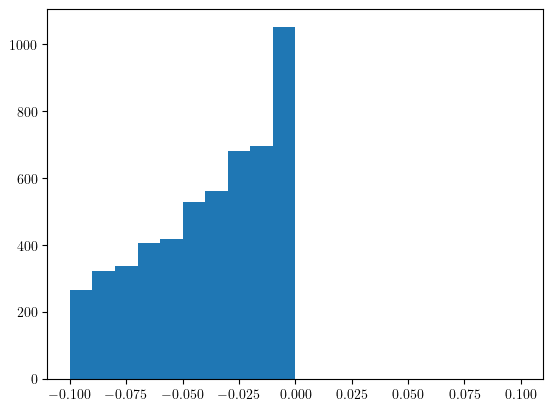

In [37]:
plt.hist(PGD_diff,np.arange(-0.1,0.101,0.01))

(0.0, 0.2)

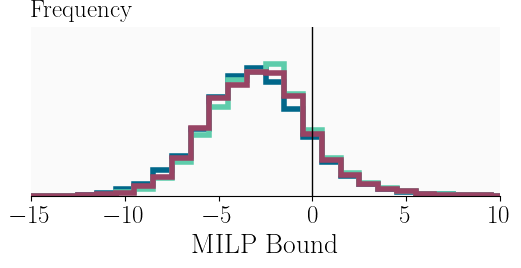

In [82]:
fig_height = 2.2

# mode = "IBP" # IBP or TAPS or SABR
MILP_bounds = {}
for mode in ["IBP", "SABR", "TAPS"]:
    root_path = f"exact_tightness/{mode}_results"
    MILP_bounds[mode] = (np.load(os.path.join(root_path, "MILP.npy"))).reshape(-1, 9)

fig, ax = plt.subplots(figsize=(11/4*fig_height, fig_height))

fontsize=18

ax.set_facecolor( (0.98, 0.98, 0.98) )
ax.set_yticks([], [])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.xaxis.label.set_size(20)
ax.yaxis.set_label_coords(0.0, 1.03)
plt.setp(ax.get_xticklabels(), fontsize=fontsize)
plt.setp(ax.get_yticklabels(), fontsize=fontsize)
bins = np.arange(-20.5,20.001,1.)

lw = 4

ax.hist(MILP_bounds["IBP"].max(1), bins=bins, density=True, color=c1, histtype="step", label="IBP", lw=lw)
ax.hist(MILP_bounds["TAPS"].max(1), bins=bins, density=True, color=c3, histtype="step", label="TAPS", lw=lw, zorder=None)
ax.hist(MILP_bounds["SABR"].max(1), bins=bins, density=True, color=c4, histtype="step", label="SABR", lw=lw)

ax.vlines(0, 0, 100, color="black", lw=1, zorder=20)

ax.set_ylabel("Frequency", fontsize=fontsize, rotation=0, ha="left")
ax.set_xlabel("MILP Bound")
ax.set_xlim(-15, 10)
# ax.set_xticks([-0.5,0,0.5], fontsize=fontsize)

ax.set_ylim(0, 0.2)


# if mode == "TAPS":
#     ax.legend(bbox_to_anchor=(1.05, 0.9), fontsize=fontsize, frameon=False)


# plt.savefig(f"exact_tightness_{mode}.pdf", bbox_inches="tight")

In [ ]:
fig, ax = plt.subplots(figsize=(2.7, 3.))
fontsize = 18
ms = 130

norm_acc = {"IBP":0.9082, "SABR":0.9173, "TAPS":0.9248}

p1 = ax.scatter(norm_acc["IBP"], cert_acc["IBP"], label="IBP", color=c1, s=ms, marker="o")
p2 = ax.scatter(norm_acc["SABR"], cert_acc["SABR"],label="SABR", color=c4, s=ms, marker="d")
p3 = ax.scatter(norm_acc["TAPS"], cert_acc["TAPS"],label="TAPS", color=c3, s=ms, marker="s")

ax.set_ylabel('Certified Accuracy', fontsize=fontsize, ha="left", rotation=0)
ax.set_xlabel("Standard Accuracy", fontsize=fontsize)
ax.yaxis.set_label_coords(0.0, 1.03)
plt.setp(ax.get_xticklabels(), fontsize=fontsize)
plt.setp(ax.get_yticklabels(), fontsize=fontsize)

ax.set_xlim([0.905,0.93])
ax.set_ylim([0.850,0.875])
ax.set_facecolor((0.98, 0.98, 0.98))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['left'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
ax.grid(False)
ax.set_aspect('equal', 'box')

plt.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    left=False,
    labelbottom=False,
    labelleft=False)
ax.plot(1, 0.850, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot(0.905, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)

#
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.08), fontsize=fontsize*0.8, ncol=2,
          frameon=False, handlelength=1)

leg1 = plt.legend(handles=[p1,p2], ncol=2, loc='upper center', bbox_to_anchor=(0.5, -0.2), fontsize=fontsize*0.8,
          frameon=False, handlelength=1)
plt.gca().add_artist(leg1)
leg1 = plt.legend(handles=[p3], ncol=1, loc='upper center', bbox_to_anchor=(0.5, -0.36), fontsize=fontsize*0.8,
          frameon=False, handlelength=1)


fig_name = "/Users/mark/Projects/TAPS/sampling-cert-training-paper/paper/figures/intro_scatter"
plt.savefig(fig_name+".png", bbox_inches="tight", pad_inches=0.12 )
plt.savefig(fig_name + ".pdf", bbox_inches="tight", pad_inches=0.12)

In [5]:
fig, ax = plt.subplots(figsize=(2.7, 3.))
fontsize = 18
ms = 130

norm_acc = {"IBP":25.92, "SABR":28.85, "SORTNET":25.69, "TAPS":28.34, "STAPS":28.98}
cert_acc = {"IBP":17.87, "SABR":20.46, "SORTNET":18.18, "TAPS":20.82, "STAPS":22.16}

# p1 = ax.scatter(norm_acc["IBP"], cert_acc["IBP"], label="IBP", color=c1, s=ms, marker="o")
# p2 = ax.scatter(norm_acc["SABR"], cert_acc["SABR"],label="SABR", color=c4, s=ms, marker="d")
# p3 = ax.scatter(norm_acc["TAPS"], cert_acc["TAPS"],label="TAPS", color=c3, s=ms, marker="s")

# ax.set_ylabel('Certified Accuracy', fontsize=fontsize, ha="left", rotation=0)
# ax.set_xlabel("Standard Accuracy", fontsize=fontsize)
# ax.yaxis.set_label_coords(0.0, 1.03)
# plt.setp(ax.get_xticklabels(), fontsize=fontsize)
# plt.setp(ax.get_yticklabels(), fontsize=fontsize)

# # ax.set_xlim([0.905,0.93])
# # ax.set_ylim([0.850,0.875])
# ax.set_facecolor((0.98, 0.98, 0.98))
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# # ax.spines['left'].set_visible(False)
# # ax.spines['bottom'].set_visible(False)
# ax.grid(False)
# ax.set_aspect('equal', 'box')

# plt.tick_params(
#     axis='both',          # changes apply to the x-axis
#     which='both',      # both major and minor ticks are affected
#     bottom=False,      # ticks along the bottom edge are off
#     top=False,         # ticks along the top edge are off
#     left=False,
#     labelbottom=False,
#     labelleft=False)
# # ax.plot(1, 0.850, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
# # ax.plot(0.905, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)

# #
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.08), fontsize=fontsize*0.8, ncol=2,
#           frameon=False, handlelength=1)

# leg1 = plt.legend(handles=[p1,p2], ncol=2, loc='upper center', bbox_to_anchor=(0.5, -0.2), fontsize=fontsize*0.8,
#           frameon=False, handlelength=1)
# plt.gca().add_artist(leg1)
# leg1 = plt.legend(handles=[p3], ncol=1, loc='upper center', bbox_to_anchor=(0.5, -0.36), fontsize=fontsize*0.8,
#           frameon=False, handlelength=1)


# fig_name = "/Users/mark/Projects/TAPS/sampling-cert-training-paper/paper/figures/intro_scatter"
# plt.savefig(fig_name+".png", bbox_inches="tight", pad_inches=0.12 )
# plt.savefig(fig_name + ".pdf", bbox_inches="tight", pad_inches=0.12)
# plt.show()

FileNotFoundError: missing font metrics file: cmr10

<Figure size 194.4x216 with 1 Axes>